In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.8, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

2024-05-12 17:44:12.478258: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 17:44:13.087831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
  layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                padding='same', activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(1000, activation = 'relu'),
  layers.Dense(18, activation='softmax' )
])

model. summary ()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2024-05-12 17:48:12.228366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-12 17:48:12.247570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-12 17:48:12.247769: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
import time

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
validation_data = (X_test, y_test))

print("fit time :", time.time() - start_time)

Epoch 1/5


2024-05-12 17:49:38.114718: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-12 17:49:38.174619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-12 17:49:38.462336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-12 17:49:38.479466: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ff879f821c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-12 17:49:38.479491: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-12 17:49:38.482511: I tensorflow/compiler/mlir/tensorflow/utils

1875/1875 [==============================] - 8s 3ms/step - loss: 0.1200 - accuracy: 0.9626 - val_loss: 0.0407 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0272 - val_accuracy: 0.9917
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0286 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0305 - val_accuracy: 0.9908
fit time : 29.807289600372314


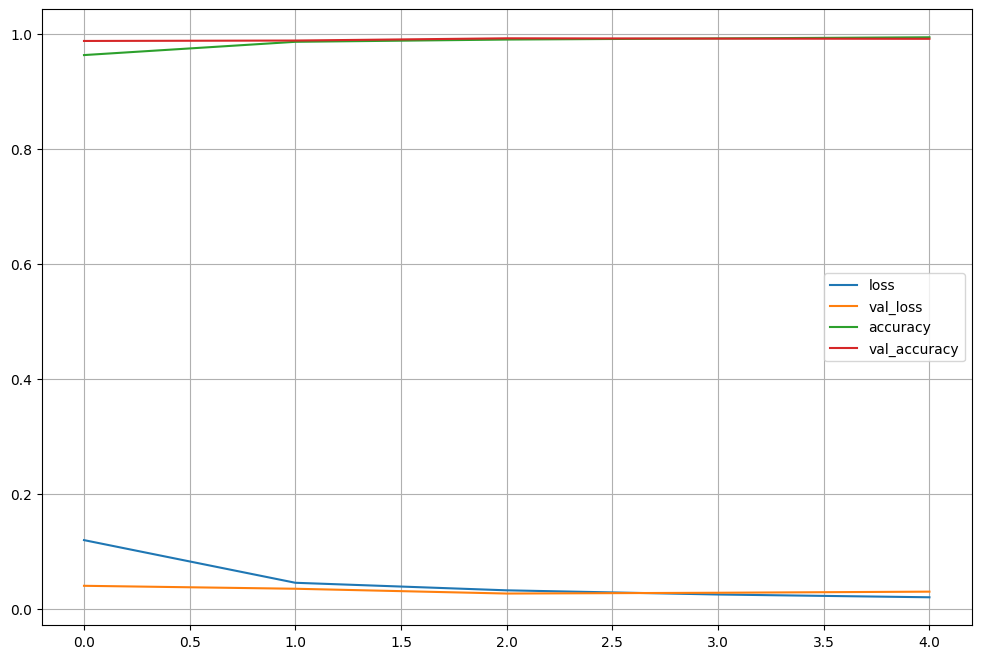

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()


In [7]:
score = model.evaluate(X_test, y_test)

print('Test loss :', score[0])

print('Test accuracy :', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9908
Test loss : 0.030509943142533302
Test accuracy : 0.9908000230789185


In [8]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 875us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [9]:
wrong_result = []
for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:

    wrong_result.append(n)

len(wrong_result)

92

In [10]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2896,
 92,
 9009,
 2129,
 1878,
 1247,
 2129,
 1903,
 2607,
 9024,
 6560,
 4761,
 2129,
 5331,
 3985,
 2135]

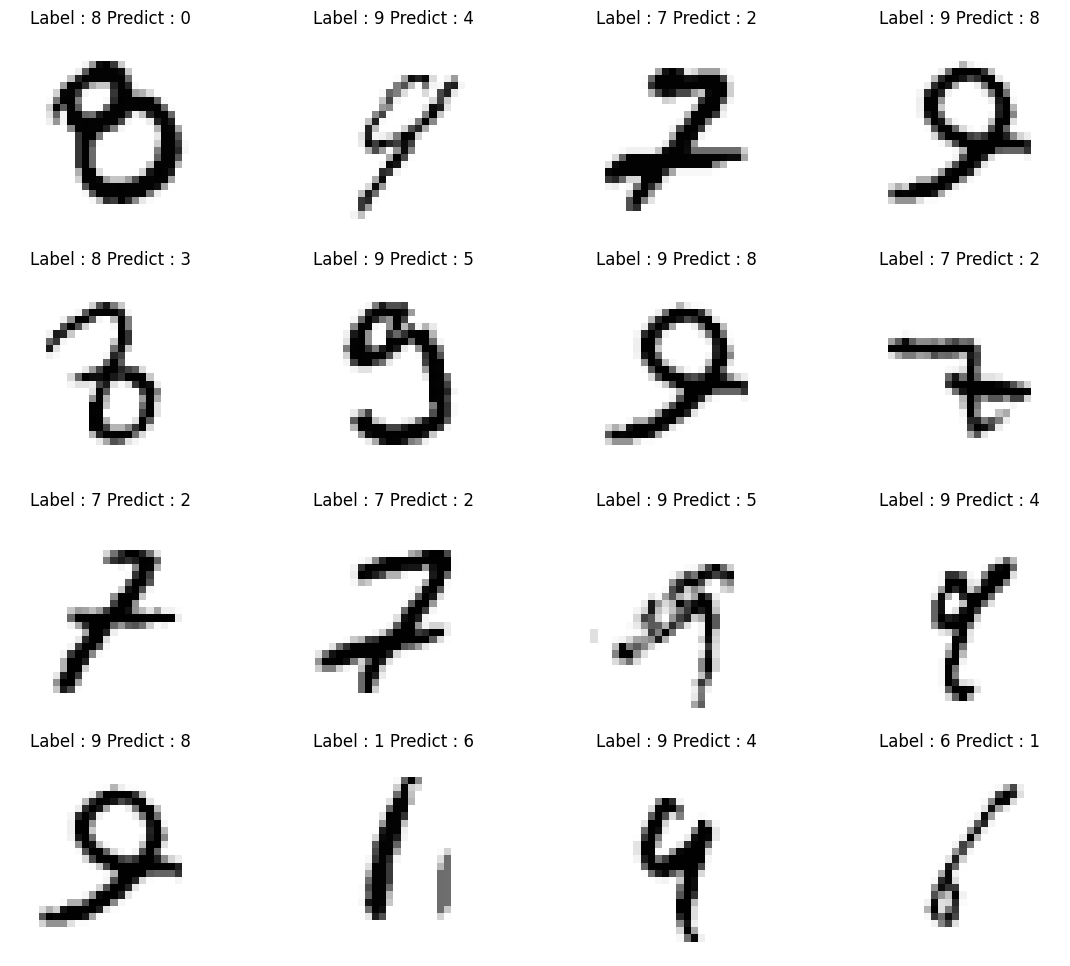

In [11]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples) :
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
  plt.axis('off')

plt.show()

In [12]:
model.save('MNIST_CNN_model.h5')

fashion_mnsit

In [14]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [15]:
score = model.evaluate(X_test, y_test)

print('Test loss :', score[0])

print('Test accuracy :', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 6.9169 - accuracy: 0.0680
Test loss : 6.916910171508789
Test accuracy : 0.06800000369548798
